In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\Users\vedan\Downloads\Retail Analysis Project  Elevate_Labs_Internship\Supermart Grocery Sales - Retail Analytics Dataset.csv")



In [4]:
data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [5]:
data.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [7]:
#Checking ffor null values
data.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

#There are no null values so we move ahead.


In [9]:
data['Order Date']=pd.to_datetime(data['Order Date'],errors='coerce')

Simulating Inventory Days
we estimate it as:
Inventory Days = Average Units in Inventory / Average Daily Sales
But first we need Average Daily Sales
Average Daily Sales = Total Sales / Number of Days

In [17]:
#Getting the date range for the data
date_range=pd.date_range(start=data['Order Date'].min(),end=data['Order Date'].max(),freq='D')

In [16]:
#total sales in the dataset
total_sales=data['Sales'].sum()

In [21]:
# Calculating Average Daily Sales
average_daily_sales= total_sales/len(date_range)
print(f"Average Daily Sales: {average_daily_sales:.2f}")

Average Daily Sales: 10394.01


Now back to Simulating Inventory Days

Average units by Inventory


In [ ]:
#Simulate estimated units sold (based on avg price)
data['Estimated Units']=data['Sales']/20 #assuming average price of 20 per unit

In [26]:
#Group by Sub-Category and aggregate
summary = data.groupby('Sub Category').agg({
    'Estimated Units': 'sum',
    'Sales': 'sum',
    'Profit': 'sum'
})

In [ ]:
#Calculate Inventory Days (based on total units and avg daily sales)
summary['Inventory Days']=summary['Estimated Units']/average_daily_sales

In [28]:
#Calculate Profit Margin %
summary['Profit Margin']=(summary['Profit']/summary['Sales'])*100

In [29]:
summary.head()

,Estimated Units,Sales,Profit,Inventory Days,Profit Margin
Sub Category,,,,,
Atta & Flour,26732.45,534649,127861.10,2.571909,23.914961
Biscuits,34204.15,684083,169357.62,3.290756,24.756882
Breads & Buns,37129.30,742586,190764.98,3.572182,25.689278
Cakes,34280.60,685612,168398.46,3.298111,24.561773
Chicken,26024.85,520497,124049.89,2.503831,23.832969


In [ ]:
#Cleaning up and sorting the summary table
summary=summary[['Estimated Units','Sales','Profit','Inventory Days','Profit Margin']].sort_values('Inventory Days',ascending=False)

In [32]:
#rounding the values for better readability
summary=summary.round(2)

In [33]:
summary.head()

,Estimated Units,Sales,Profit,Inventory Days,Profit Margin
Sub Category,,,,,
Health Drinks,52571.95,1051439,267469.79,5.06,25.44
Soft Drinks,51693.70,1033874,258135.97,4.97,24.97
Cookies,38410.65,768213,190643.70,3.70,24.82
Breads & Buns,37129.30,742586,190764.98,3.57,25.69
Noodles,36771.75,735435,193685.81,3.54,26.34


In [ ]:
#Correlation between Inventory Days and Profit Margin in %
corr = summary[['Inventory Days', 'Profit Margin']].corr()
print("Correlation:\n", corr)


Correlation:
                 Inventory Days  Profit Margin
Inventory Days        1.000000       0.042585
Profit Margin         0.042585       1.000000


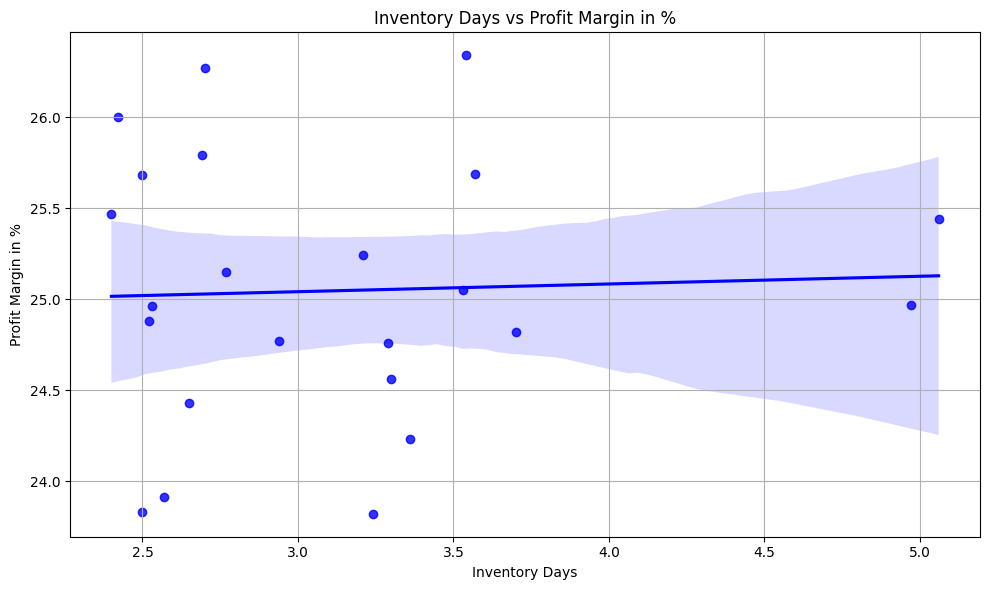

In [38]:
#Visualizing the correlation using a scatter plot
plt.figure(figsize=(10,6))
sns.regplot(x='Inventory Days',y='Profit Margin',data=summary,marker='o',color='blue')
plt.title('Inventory Days vs Profit Margin in %')
plt.xlabel('Inventory Days')
plt.ylabel('Profit Margin in %')
plt.grid(True)
plt.tight_layout()
plt.show()